In [153]:
import math
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [317]:
def HowClose(x, test): # a helper function used for graphing convergence
    try:
     return math.log10(abs(x-test))
    except ValueError:
        return None

# Part 1

## Question 1

first we define our function following the standard formula for the taylor series of sin x $$\sin(x) = \sum_{i = 0}^{\infty}(-1)^i \frac{x^{2i + 1}}{i!}$$ truncating it at the nth term.

In [40]:
def powersin(x, n=15):
    estimate = 0
    for i in range(n):
        plusorminus = (-1)**i
        factorialbit = math.factorial(2*i + 1)
        exponentbit = x**(2*i + 1)
        term = plusorminus * exponentbit / factorialbit
 
        estimate = estimate + term
    return estimate

        

In [4]:
powersin(-1, 14)- math.sin(-1)

0.0

now we graph to see quality.

In [5]:
def errorplot(number, terms = 15):
    x = range(terms)
    def error(x): 
        return math.log(abs((powersin(number,x)-math.sin(number))/(math.sin(number))))
    y = [error(i) for i in x]
    plt.plot(x, y)
    plt.xlabel("number of terms")
    plt.ylabel("Log error")
    plt.title(f'error of power series for sin({number})')
    plt.show()
                       

### Cases

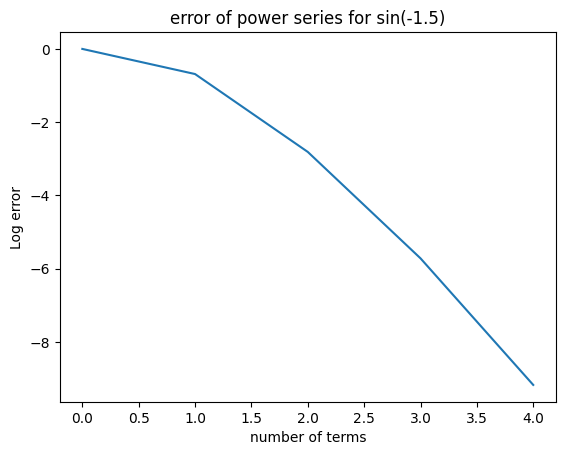

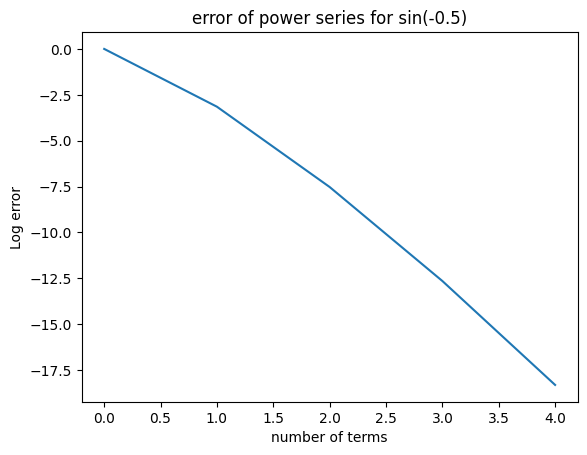

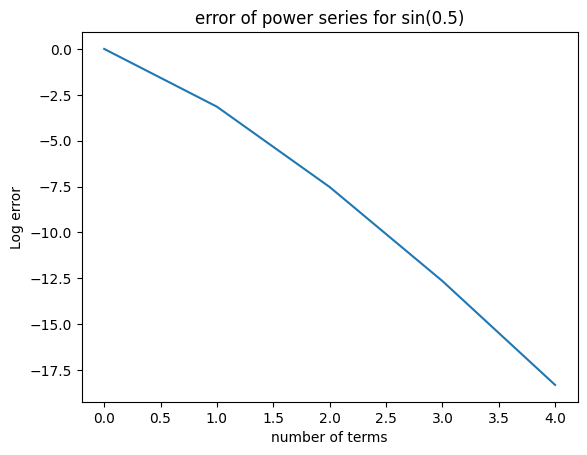

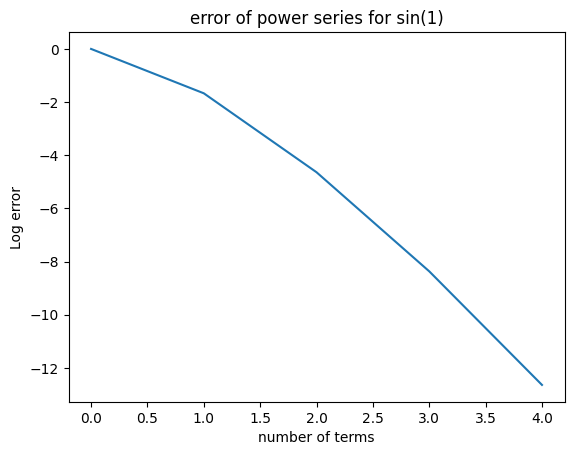

In [17]:
for i in (-1.5, -0.5, 0.5, 1):
    errorplot(i, 5)

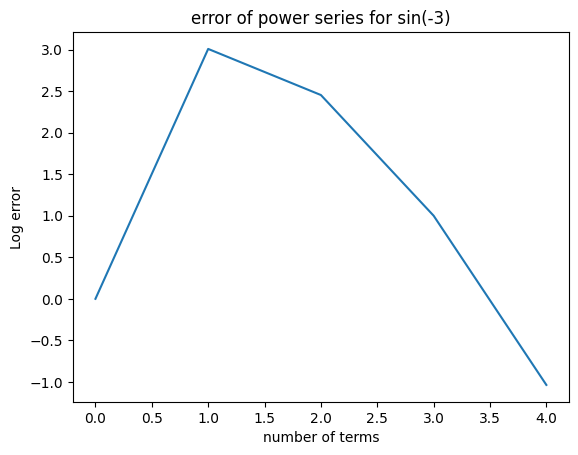

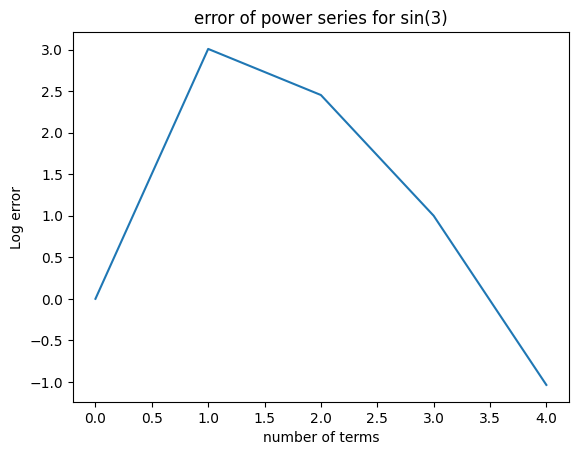

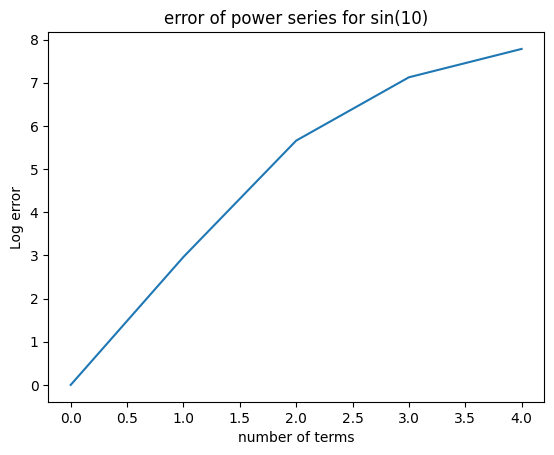

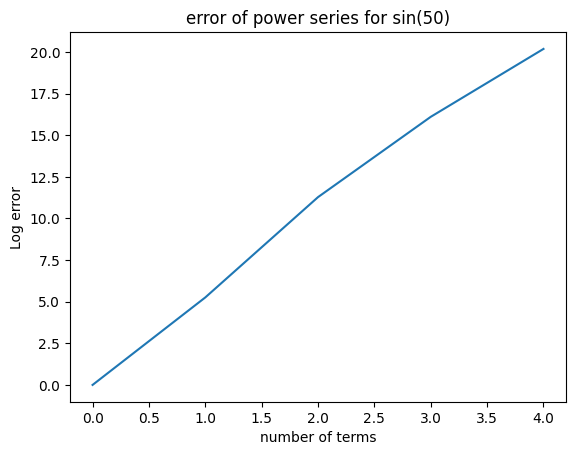

In [8]:
for i in (-3, 3, 10, 50):
    errorplot(i,5)
              

we can observe that the general shape of the graph is different for different values. For values close to zero, we have  an almost linear downwards slope, with the error decreasing with each term. 
for further from zero we first see the error increase dramatically, then decrease, following a roughly parabolic trajectory. For very large values we run into computation problems(such as the value or each term getting too large) before we can see the error decrease.
generally, the slope (if negative) indicates the convergence rate. the slope is the K term in the equation for linear convergence $\epsilon_n = K^{-n}\epsilon_0$

## Question 2 

Since the mclaurin series for sinx always converges(eventually) we don't strictly speaking neeed to perform any argument reduction, however it is still well worth doing.
sin(x) is $2\pi$ periodic so we can very easily reduce the value to within $-\pi<x<\pi$ just by adding and subtracting pi. I created an algorithm to do this as an intermediate step of assignment 1. This algorithm is reproduced here. This algorithm is fast even for very large values of x, which is acheived by subtracting large multiples of pi.


### Functions

In [35]:
def inPlusMinusPi(x):  
    #get it within (-pi,pi) by subtracting 2pi * decreasing powers of ten
    if x == 0: 
        return x
    n = math.floor(math.log10(abs(x)))+1 #an estimate of the size of the number, used to know where to start subtracting.
    for i in range(n)[::-1]:
        while abs(x)> math.pi*(10**i):       
            if x > math.pi*(10**i):
                x = x-2*math.pi*(10**i)
            elif x<-math.pi*(10**i):
                x = x + 2*math.pi*(10**i)
    return(x)
    

We can further reduce the angle using symetry arguments to get the value in the range $0<x<\frac{\pi}{2}$. This comes with the cost of requiring additional steps at the end to correct the sign,
Alternatively we can use an angle halving method to get arbitrarily close to zero. If we do this enough we do not even need to consider any more than the first term. This was the focus of Lab 1. This method requires repeatedly taking square roots to return the correct answer. It also has problems with symetry meaning it requires an initial stepto get $-\pi<x<\pi$ to make sure the sign of the answer is correct.
My final two methods I will check then are the symetry method which reduces the angle using symetry to $0<x<\frac{\pi}{2}$ then takes the power series to 10 terms. This is enough to get zero error for much of the range.
My other method is to use symetry to get within $-\pi<x<\pi$ and then halve until my value is within $|x|<0.005$, and compute three terms, which again maxes out precision for much of the range


In [42]:
def SinReduc(theta): #taken from lab 1
    x = inPlusMinusPi(theta)
    if x<= -math.pi/2:
        x = x+ math.pi
        CorrectSign = False
    elif -math.pi/2<x<=0:
        x = -x
        CorrectSign = False
    elif 0<x<= math.pi/2:
        x = x
        CorrectSign = True
    else: #math.pi/2 <x<math.pi)
        x = -(x-math.pi)
        CorrectSign = True
    return (x, CorrectSign)
def SymetricSin(theta):
    x, CorrectSign = SinReduc(theta)
    sine = powersin(x,10)
    if CorrectSign == True: return sine
    else: return -sine

In [82]:
def HalvingSin(theta):
    theta = inPlusMinusPi(theta)
    halves = 0
    while abs(theta)>0.05:
        theta = theta/2
        halves += 1
    l = powersin(theta, 3)
    for i in range(halves):
         l = 2*l*math.sqrt(1-(l*l))
    return l
        
        

### testing
Now i will plot their accuracy for every integer between -10 and 1000. 

In [396]:
def Error(attempt, benchmark , x):
    try:
        return math.log10(abs((attempt(x)-benchmark(x))/(benchmark(x))))
    except ValueError :
        return None
    except ZeroDivisionError:
        return -5

    

    
    

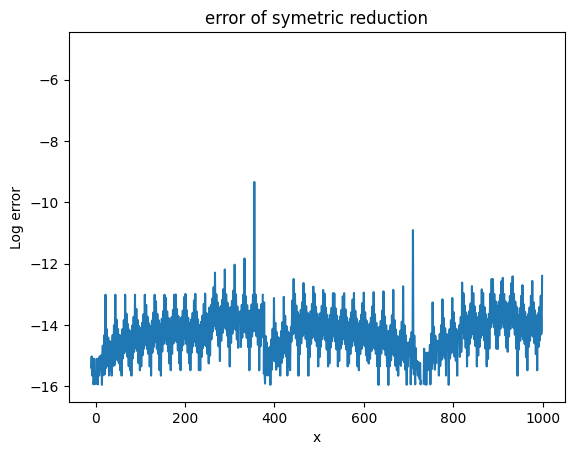

In [397]:

x = range(-10, 1000)
y = [Error(SymetricSin, math.sin, i) for i in x]
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Log error")
plt.title(f'error of symetric reduction')
plt.show()
                   

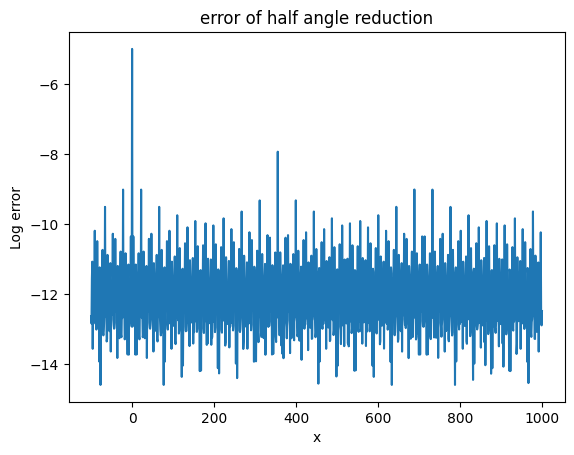

In [398]:
x = range(-100, 1000)
y = [Error(HalvingSin, math.sin, i) for i in x]
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Log error")
plt.title(f'error of half angle reduction')
plt.show()
                

We see that both of the methods are good, but somewhat spikey. I think this comes from values close to multiples of pi(which have sin(x) = 0) causing large relative error. I chose the symetric method as it is most comparable with the straight powers method.

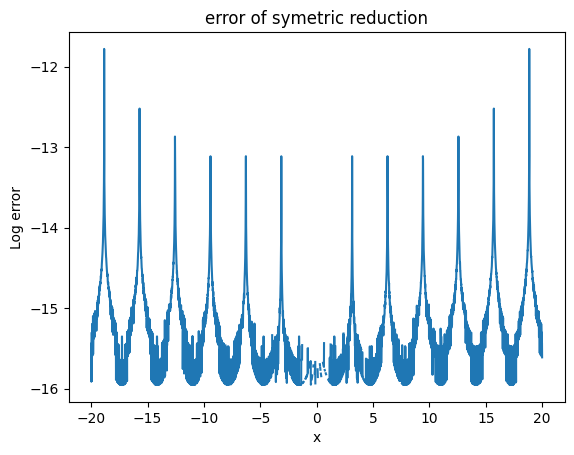

In [399]:
x = np.arange(-20, 20, 0.01)
y = [Error(SymetricSin, math.sin, i) for i in x]
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Log error")
plt.title(f'error of symetric reduction')
plt.show()

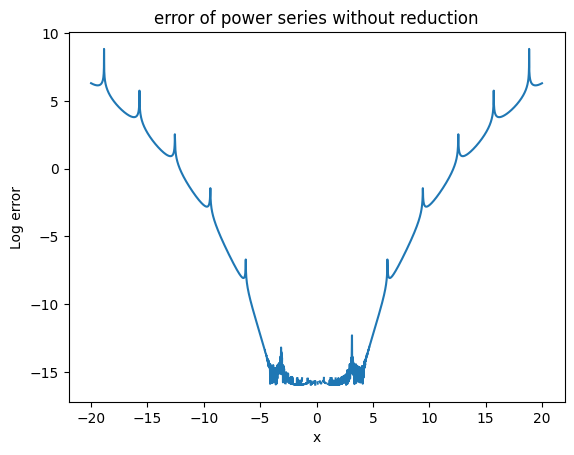

In [400]:
x = np.arange(-20, 20, 0.01)
y = [Error(powersin, math.sin, i) for i in x]
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Log error")
plt.title(f'error of power series without reduction')
plt.show()

So we see that reduction is very important for larger values of theta, as without them the whole thing blows up very quickly

## Question 3

We can calculate ln(x) by way of the power series for ln(1+x). 

This only converges for $0< 1+x< 2$, so some argument reduction is first neccessary. The tricks we have at our disposal are $$\ln(xy) = \ln(x) +\ln(y)$$ 
$$\ln(x^a) = a\ln(x)$$
We can use these to remove powers of two, as $$\ln(m \times 2^\alpha) = \alpha\ln(2) + \ln(m)$$.
This is very good for floating point numbers, since we have the number stored in the form $m \times 2^\alpha$ and can easily extract that. The mantissa returned by the python function is between 0.5 and 1. We double this, to get it in the required range of $1<m<2$, making the neccessary adjustments to the exponent

An alternative method is that used in Lab 1, which takes repeated square roots. This works using the second law and the identity $\sqrt{x}^2 = x$ for x positive. This has the advantage that it does not require any numbers to be precomputed. 
For my method i will use always use the first method, and use the second method to various degrees to compare the benefit of higher powers and argument reduction

In [406]:
def FancyLog(x, p = 6):
    
    m, alpha = math.frexp(x)
    m = 2*m #correcting to our desired range
    alpha = alpha - 1 
    ln2Bit = 0.6931471805599453 * alpha #the number is ln(2), taken from power series notes(verified w/ built in log function)

    #now we shrink m closer to 1 by square rooting 3 times
    n = 3
    z = m-1 # we first do the subtraction.
    for i in range(n):
        z = z/(1+math.sqrt(1+z))
    #use the power series
    l = 0
    for i in range(p):
        term = (-1)**i * z**(i+1)/(i+1)
        l = l+term
    
    # And undo the square rooting
    for i in range(n):
        l = 2*l
     #and finally add it together
    lnx = l + ln2Bit
    return lnx
    
    




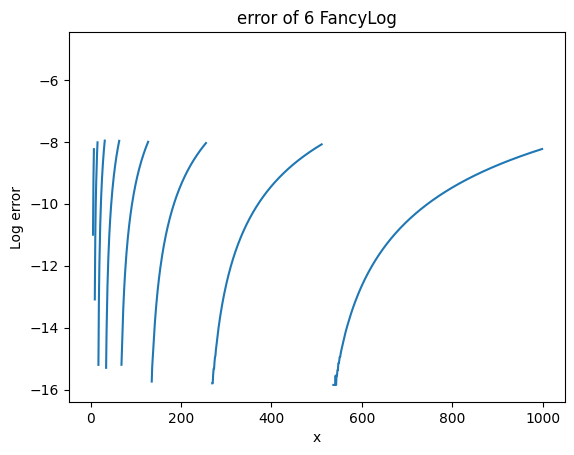

In [407]:
x = range(1, 1000)
y = [Error(FancyLog, math.log, i) for i in x]
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Log error")
plt.title(f'error of 6 FancyLog')
plt.show()

In [408]:
def FancyLogPis10nis3(x):
    p = 10
    m, alpha = math.frexp(x)
    m = 2*m #correcting to our desired range
    alpha = alpha - 1 
    ln2Bit = 0.6931471805599453 * alpha #the number is ln(2), taken from power series notes(verified w/ built in log function)

    #now we shrink m closer to 1 by square rooting 3 times
    n = 3
    z = m-1 # we first do the subtraction.
    for i in range(n):
        z = z/(1+math.sqrt(1+z))
    #use the power series
    l = 0
    for i in range(p):
        term = (-1)**i * z**(i+1)/(i+1)
        l = l+term
    
    # And undo the square rooting
    for i in range(n):
        l = 2*l
     #and finally add it together
    lnx = l + ln2Bit
    return lnx
    

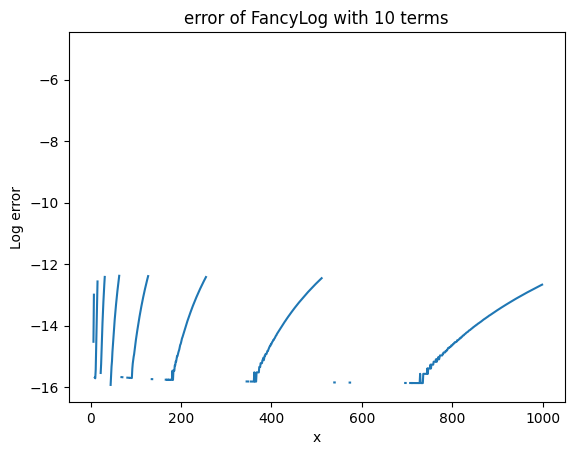

In [409]:
x = range(1, 1000)
y = [Error(FancyLogPis10nis3, math.log, i) for i in x]
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Log error")
plt.title(f'error of FancyLog with 10 terms')
plt.show()

Trying with a modified version with a few more terms we see that our error gets smaller than floating point can handle without many more terms
We can also slightly  modify by doing a bit more argument reduction(and the inital number of terms)

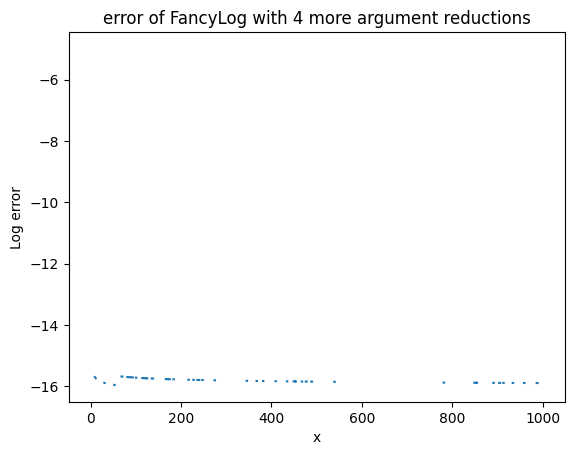

In [404]:
def FancyLogPis6nis7(x):
    p = 10
    m, alpha = math.frexp(x)
    m = 2*m #correcting to our desired range
    alpha = alpha - 1 
    ln2Bit = 0.6931471805599453 * alpha #the number is ln(2), taken from power series notes(verified w/ built in log function)

    #now we shrink m closer to 1 by square rooting 3 times
    n = 7
    z = m-1 # we first do the subtraction.
    for i in range(n):
        z = z/(1+math.sqrt(1+z))
    #use the power series
    l = 0
    for i in range(p):
        term = (-1)**i * z**(i+1)/(i+1)
        l = l+term
    
    # And undo the square rooting
    for i in range(n):
        l = 2*l
     #and finally add it together
    lnx = l + ln2Bit
    return lnx
x = range(1, 1000)
y = [Error(FancyLogPis6nis7, math.log, i) for i in x]
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Log error")
plt.title(f'error of FancyLog with 4 more argument reductions')
plt.show()
    

So we see that either increasing the amount of argument reduction or the number of terms can get a small error. Finally i show the convergence for fancylog for x = 1100, which seems pretty good.


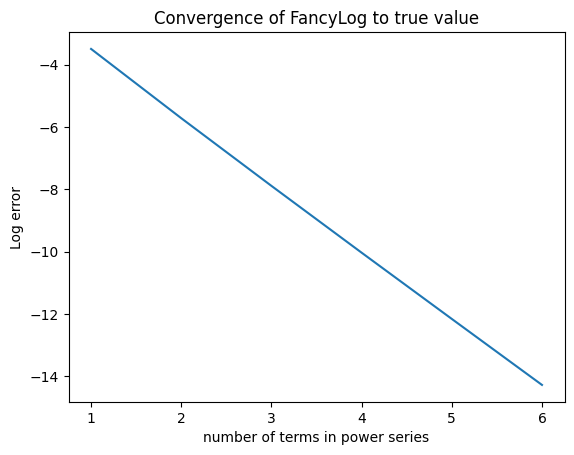

In [414]:
x = range(1, 10)
y = [HowClose(FancyLog(1100,p = i),math.log(1100)) for i in x]
plt.plot(x, y)

plt.xlabel("number of terms in power series")
plt.ylabel("Log error")
plt.title(f'Convergence of FancyLog to true value')
plt.show()

## Question 4

We try the methods of computing ln(3). The one i wrote in question 3(with 6 terms for the power series), the way that does a lot of argument halving and a 1 term power series(provided in lab 1) and the built in function as a benchmark. The function done in lab 1 has been modified to have a similar accuracy to the function i made in question 3

In [415]:
def Reduclog(x, n = 29): #Taken from Lab 1
  z = x-1 
  for i in range(n):
    z = z/(1+math.sqrt(1+z)) 
  l = z 
  for i in range(n):
    l = l*2
  return l


In [416]:
print(math.log(3)-Reduclog(3))
print(math.log(3) - FancyLog(3))

-1.1240586239580352e-09
1.1222631712826114e-09


In [417]:
start = timer()
for i in range(100000):
    Reduclog(3)

end = timer()
print(f'runtime for ReducLog is {end-start} seconds')

runtime for ReducLog is 0.36625741701573133 seconds


In [418]:
start = timer()
for i in range(100000):
    FancyLog(3)
end = timer()
print(f'runtime for FancyLog is {end-start} seconds')

runtime for FancyLog is 0.16485466598533094 seconds


In [419]:
start = timer()
for i in range(100000):
    math.log(3)

end = timer()
print(f'runtime for math.log is {end-start} seconds')

runtime for math.log is 0.018898834008723497 seconds


The actual time varies from run to run, however in general the default method is by far the fastest, followed by my method, followed by the method that uses just argument halving.

# Part 2

## Question 1

First we make functions for herons method and goldschmidts method

In [378]:
def heronroot(a,iterations, guess):
    x = guess
    for i in range(iterations):
        x = 0.5*(x + a/x)
    return x
    
    
    

In [379]:
def goldschmidtroot(a, iterations, guess):
    y =  1/guess
    b = a
    g = y
    for i in range(iterations):
        b = b*y**2
        y  = (3-b)/2
        g = g*y
    return g*a

In [365]:
goldschmidtroot(78,5,8)

8.831760866327846

We compare the two proceedures by calculating $\sqrt{78}$ with a starting guess of 10. I have not implemented it in code here, but for a complete function it would be best to have some sort of lookup table. Since that is not the focus of this question i have opted to just make a reasonable guess

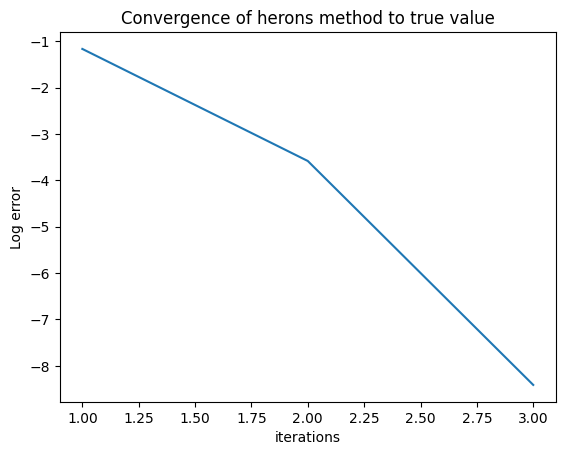

In [381]:
x = range(1, 10)
y = [HowClose(heronroot(78, i, 10),math.sqrt(78)) for i in x]
plt.plot(x, y)

plt.xlabel("iterations")
plt.ylabel("Log error")
plt.title(f'Convergence of herons method to true value')
plt.show()

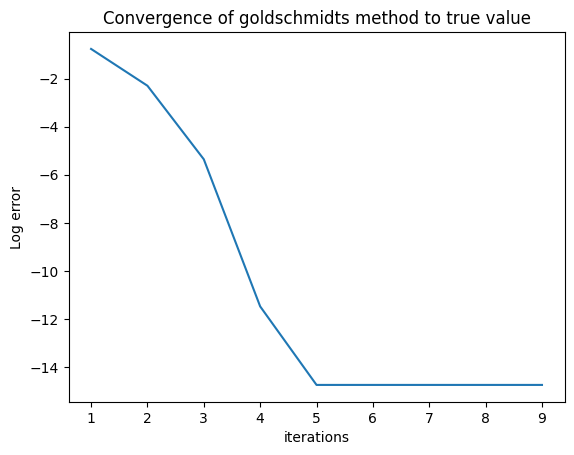

In [382]:
x = range(1, 10)
y = [HowClose(goldschmidtroot(78, i, 10),math.sqrt(78)) for i in x]
plt.plot(x, y)

plt.xlabel("iterations")
plt.ylabel("Log error")
plt.title(f'Convergence of goldschmidts method to true value')
plt.show()

and we see that it looks pretty. Herons method converges quadratically, running out of computer precision after 5 iterations. Goldschmidts method by contrast runs into problems, with it no longer converging quadratically after 4 iterations. I believe this to be because error accumulates in goldschmidt, which dominates for more that 5 iterations. However 

I now devise an experiment to show the error correcting properties of herons method. I do this by creating a version of herons method that has an error at iteration number 3, where it adds 0.1, then continues onwards.
I do the same with goldschmidts method


In [384]:
def Errorheronroot(a,iterations, guess):
    #herons method requires an initial guess. we just use x
    x = guess
    for i in range(iterations):
        x = 0.5*(x + a/x)
        if i == 3: x = x*1.5
    return x
    

In [373]:
def Errorgoldschmidtroot(a, iterations, guess):
    y =  1/guess
    b = a
    g = y
    for i in range(iterations):
        b = b*y**2
        y  = (3-b)/2
        g = g*y
        if i ==3 : g = g*1.001
    return g*a

We graph these functions with added error exactly as before

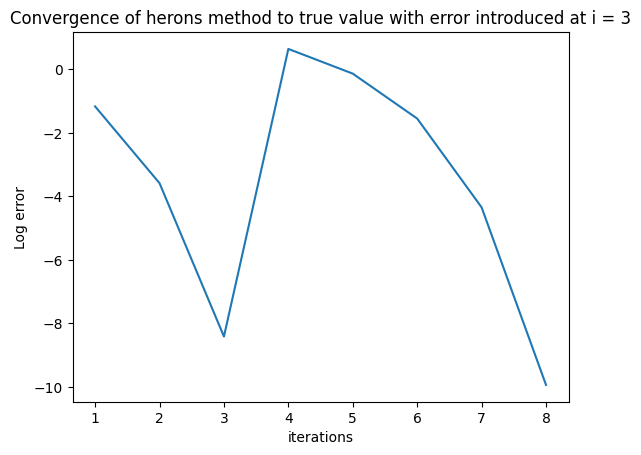

In [385]:
x = range(1, 10)
y = [HowClose(Errorheronroot(78, i, 10),math.sqrt(78)) for i in x]
plt.plot(x, y)

plt.xlabel("iterations")
plt.ylabel("Log error")
plt.title(f'Convergence of herons method to true value with error introduced at i = 3')
plt.show()

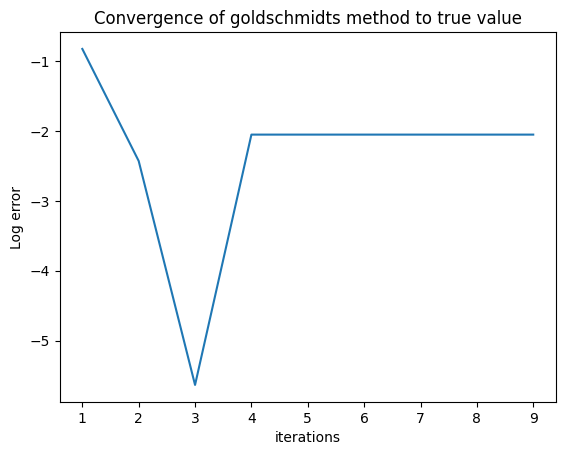

In [375]:
x = range(1, 10)
y = [HowClose(Errorgoldschmidtroot(78, i, 8),math.sqrt(78)) for i in x]
plt.plot(x, y)

plt.xlabel("iterations")
plt.ylabel("Log error")
plt.title(f'Convergence of goldschmidts method to true value')
plt.show()

so we see that while the addition of error caused herons method to be slightly wrong temporarily and take an additional few steps to reach the true value(hence error correcting) goldschmidts method does not have this property, and instead after error is introduced(and a much smaller error than used on herons) the estimate keeps the error introduced.

## Question 2

I will use the newtons method solution as my quadratic approach and a chord method for the linearly convergent way.
These were both found analytically in the homework assignment as having the iterations
$$x_{n+1} = x_{n} - \frac{\sin x_n - e^{-x_n}}{\cos x_n + e^{-x_n}}$$
for Newtons method, and 
$$x_{n+1} = x_n - \frac{1}{4}(\sin x_n - e^{-x_n})$$ for the chord method

In [311]:
def NewtonsSol(n):
    x = 1
    
    for i in range(n):
        x = x - (math.sin(x) - math.exp(-x))/(math.cos(x) + math.exp(-x))
    return x
NewtonsSol(20) # a little test

0.5885327439818611

In [235]:
def ChordSol(n):
    x = 1
    for i in range(n):
        x = x - 1/4 * (math.sin(x) - math.exp(-x))
    return x
ChordSol(100)

0.5885327439818613

In [238]:
math.sin(0.5885327439818611) - math.exp(-0.5885327439818611)

0.0

the solution obtained by my newtons method in 20 iterations is accurate as far as python can tell, so i will treat it as correct.
To see convergence I will graph the log difference between the methods output and 0.5885327439818611 as a function of the number of iterations.

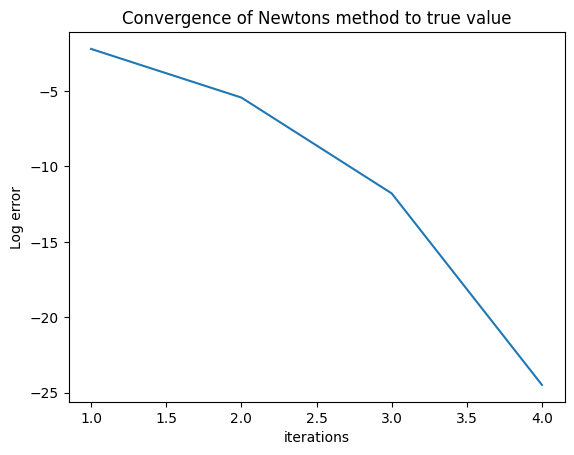

In [258]:

x = range(1, 20)
y = [HowClose(NewtonsSol(i),0.5885327439818611) for i in x]
plt.plot(x, y)

plt.xlabel("iterations")
plt.ylabel("Log error")
plt.title(f'Convergence of Newtons method to true value')
plt.show()

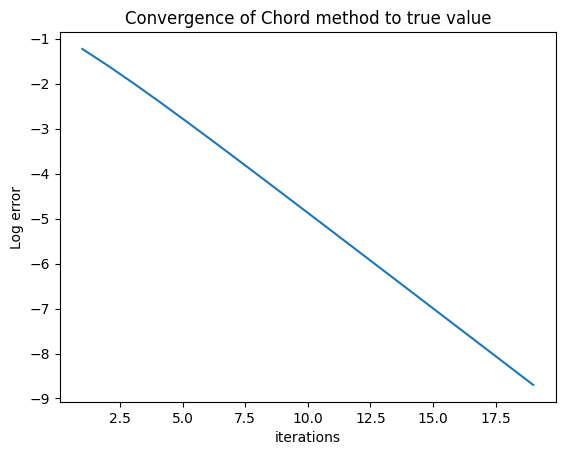

In [259]:

x = range(1, 20)
y = [HowClose(ChordSol(i),0.5885327439818611) for i in x]
plt.plot(x, y)

plt.xlabel("iterations")
plt.ylabel("Log error")
plt.title(f'Convergence of Chord method to true value')
plt.show()

We can see that the log difference declines linearly for the chord method, while it declines like a parabola(ie quadratically) for Newtons method, showing that we have the desired convergence. Note also that newtons method maxes out the available precision after just 4 iterations

## Question 3
We will implememt the Newton-Raphson method to solve the equation $4y^3 - 3y = a$ for $0≤a≤1$

Newton-Raphson says that to solve f(x) = 0, we iterate as $$x_{n+1} = x_n - \frac{f'(x_n)}{f(x_n)}$$ so rearranging our equation to be $f(y) = 4y^3 - 3y - a$ and taking derivatives we have the final iteration to be $$x_{n+1} = x_n - \frac{4x_n^3 - 3x_n - a}{12x_n^2 - 3}$$ I implement this in the following cell. 

In [263]:
def NRsolver(a,n, est):
    x = est #chose a reasonably good estimate, change the estiate if you are getting a differnet solution to the one you desire
    for i in range(n):
        term = (4*x**3 - 3*x - a )/ (12*x**2 - 3 )
        x = x - term
    return x

### Now i test convergence

Since the roots fall in the range $[-1, 1]$ for the a values we care about,  which i found out by playing around on a graphing calculator, I will be looking for the root found starting with the initial estimate of 1. 
I will test for a values  0, 0.25, 0.5, 0.75, 1. My algorithm runs into some sort of problem for a = 0, and a = 0.5. The results error in the results ends up alternating, presumably for some numerical reason. The answer is still close(as we can tell by the function being very close to 0) so i will not let it bother me.



In [270]:
print(NRsolver(0,20,1))
print(NRsolver(0.25,20,1))
print(NRsolver(0.5,20,1))
print(NRsolver(0.75,20,1))
print(NRsolver(1,20,1))

0.8660254037844386
0.9050189646169765
0.9396926207859084
0.9711209254848331
1.0


In [280]:
#first get exact values, by iterating a bunch, and checking its good enough
a = NRsolver(0,22,1)
b = NRsolver(0.25,20,1)
c = NRsolver(0.5,21,1)
d = NRsolver(0.75,20,1)
e = NRsolver(1,20,1)
print(4*a**3 - 3*a - 0)
print(4*b**3 - 3*b - 0.25)
print(4*c**3 - 3*c - 0.5)
print(4*d**3 - 3*d - 0.75)
print(4*e**3 - 3*e - 1)


-4.440892098500626e-16
0.0
-4.440892098500626e-16
0.0
0.0
0.002560599545963438


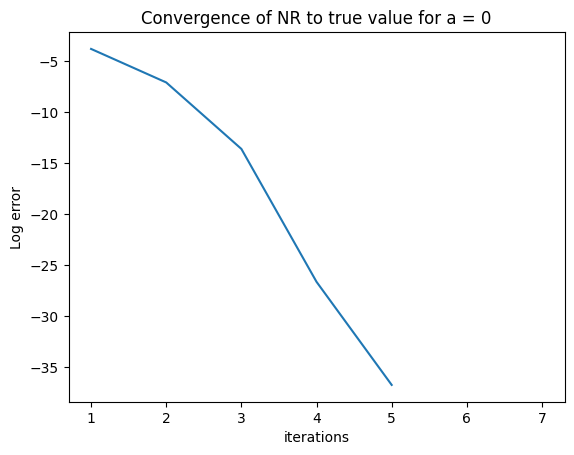

In [300]:

    x = range(1, 8)
    y = [HowClose(NRsolver(0,i, 1),0.8660254037844386) for i in x]
    plt.plot(x, y)
    plt.xlabel("iterations")
    plt.ylabel("Log error")
    plt.title(f'Convergence of NR to true value for a = 0')
    plt.show()

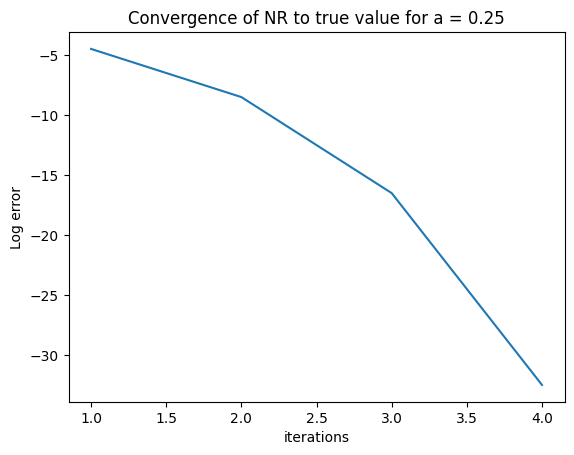

In [301]:
x = range(1, 6)
y = [HowClose(NRsolver(0.25,i, 1),0.9050189646169765) for i in x]
plt.plot(x, y)
plt.xlabel("iterations")
plt.ylabel("Log error")
plt.title(f'Convergence of NR to true value for a = 0.25')
plt.show()

In [308]:
NRsolver(0.75,20, 1)

0.9711209254848331

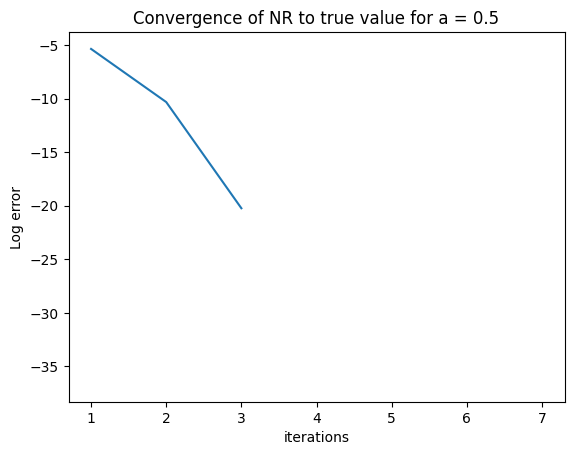

In [307]:
x = range(1, 8)
y = [HowClose(NRsolver(0.5,i, 1),0.9396926207859084) for i in x]
plt.plot(x, y)
plt.xlabel("iterations")
plt.ylabel("Log error")
plt.title(f'Convergence of NR to true value for a = 0.5')
plt.show()

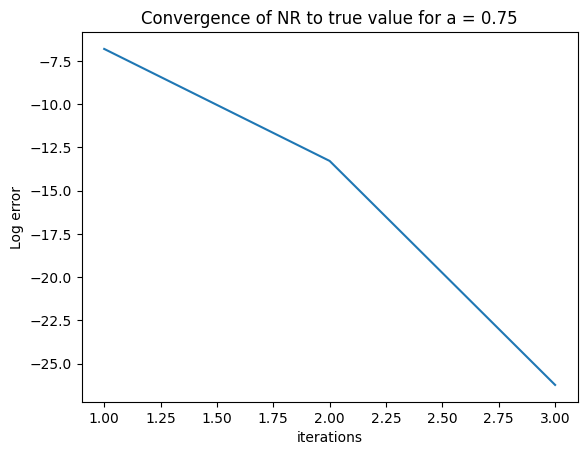

In [309]:
x = range(1, 8)
y = [HowClose(NRsolver(0.75,i, 1),0.9711209254848331) for i in x]
plt.plot(x, y)
plt.xlabel("iterations")
plt.ylabel("Log error")
plt.title(f'Convergence of NR to true value for a = 0.75')
plt.show()

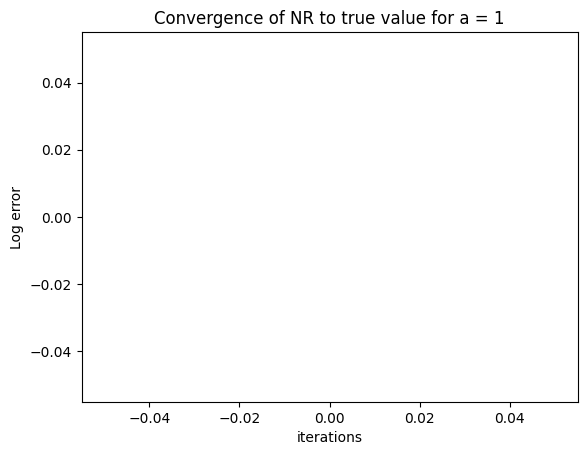

In [310]:
x = range(1, 8)
y = [HowClose(NRsolver(1,i, 1),1) for i in x]
plt.plot(x, y)
plt.xlabel("iterations")
plt.ylabel("Log error")
plt.title(f'Convergence of NR to true value for a = 1')
plt.show()

And we observe from the shape of the curve that convergence is indeed quadratic. a = 1 acheives the solution immediatly so the graph is empty

### finally I look at sin.
I know cos(60°) = 1/2, so i imput that as the a value in my solver alongside an estimate of 1, since 20° is a fairly small angle. I then use pythagoras to obtain the value of sin(20°).
$$\sin(20°) = \sqrt{1 - \cos^2(20°)}$$

In [264]:
cos20 = NRsolver(1/2, 15, 1)
print(math.sqrt(1- cos20**2))

0.342020143325669


Which is the correct answer!